- Write code for a simple model with at least one parameter (like coin probability, normal distr. mean, etc.) and an observable related to that parameter

- Create a figure of the "Neyman Construction" (see March 23 lecture), i.e. make a 2D plot with "true" parameter value on the x-axis and "measured" value on the y-axis, sampling many random experiments for each true value 

- Bonus (not worth additional points) - pretend that you did the experiment and measured a particular value of the parameter. What are the "error"'s/what is the posterior distribution for the parameter after the measurement? (you can get this from your 2D plot by looking at the 1D slice from the 2D histogram corresponding to the "measured" value).

In [13]:
import numpy as np
from numpy import c_
import matplotlib.pyplot as plt
import random

In [23]:
# My function:
def Gauss(numbs,mu_true, sigma):
    return 1./(np.sqrt(2.*np.pi)*sigma)*np.exp(-np.power((numbs - mu_true)/sigma, 2.)/2)

In [143]:
Nmeas = 10
Nexp  = 100000
bounds = 100

mu_experiment = 0

mu_true = 0
mu_best = 0
sigma = 1

#2D histogram 
X_Mu_True = [] #We will combines the two into a 2d plot using mathplot lib his2d
Y_Mu_Best = []  

# 3Neyman construction being implemented
for i in range(-bounds,bounds,1):
    mu_true = float(i)/10.
    
    for e in range (0,Nmeas):
        mu_best = 0
        for p in range(0,Nmeas):
            rando = random.random()
            x = Gauss(rando, mu_true, sigma)
            mu_best += x
        
        # our "measurement" for mu best fit
        mu_best = mu_best / float(Nmeas);
        Y_Mu_Best.append(mu_best)
        X_Mu_True.append(mu_true)
        

In [111]:
print(len(X_Mu_True))
print(len(Y_Mu_Best))

2000
2000


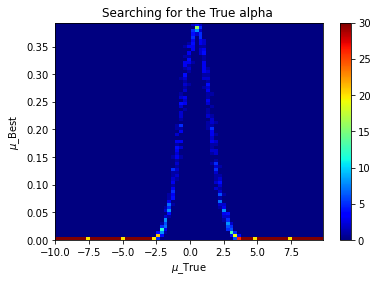

In [145]:
x_min = np.min(X_Mu_True)
x_max = np.max(X_Mu_True)

y_min = np.min(Y_Mu_Best)
y_max = np.max(Y_Mu_Best)

x_bins = np.linspace(x_min,x_max,70)
y_bins = np.linspace(y_min,y_max,70)

plt.title("Searching for the True alpha ")
plt.xlabel('$\mu$_True')
plt.ylabel('$\mu$_Best')
plt.hist2d(X_Mu_True,Y_Mu_Best, bins=[x_bins,y_bins], cmap=plt.cm.jet)
plt.colorbar()
